# N-Asset Efficient Frontier

In [2]:
%load_ext autoreload
%autoreload 2

import edhec_risk_kit as erk

ind = erk.get_ind_returns()
er = erk.annualise_rets(ind['1996':'2000'], 12)
cov = ind['1996':'2000'].cov()

In [3]:
from scipy.optimize import minimize

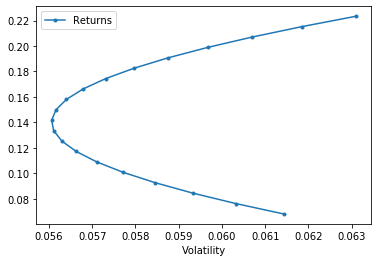

In [4]:

l = ['Games', 'Fin']
erk.plot_ef2(20, er[l], cov.loc[l,l])

In [5]:
import numpy as np

def minimise_vol(target_return, er, cov):
    """
    Target return -> weight vector
    """
    n = er.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),)*n
    return_is_target = {
        'type': 'eq',
        'args': (er,),
        'fun': lambda weights, er: target_return - erk.portfolio_return(weights, er)
    }
    weights_sum_to_1 = {
        'type':'eq',
        'fun': lambda weights: np.sum(weights)-1
    }
    results = minimize(erk.portfolio_vol, init_guess, 
                       args=(cov,), method="SLSQP", 
                       options={'disp':False},
                       constraints=(return_is_target, weights_sum_to_1),
                       bounds=bounds
                      )
    return results.x

In [6]:
l

['Games', 'Fin']

In [10]:
w15 = minimise_vol(0.15, er[l], cov.loc[l,l])
vol15 = erk.portfolio_vol(w15, cov.loc[l,l])
vol15

0.056163669406706564

In [14]:
w15

array([0.79512455, 0.20487545])

In [28]:
w15 = erk.minimise_vol(0.15, er[l], cov.loc[l,l])
vol15 = erk.portfolio_vol(w15, cov.loc[l,l])
vol15

0.056163669406706564

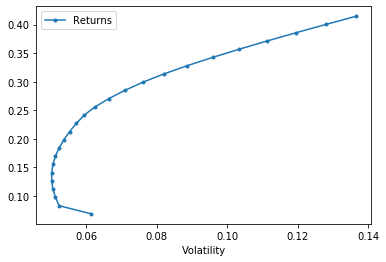

In [30]:
l = ["Smoke", "Fin", "Games", "Coal"]
erk.plot_ef(25, er[l], cov.loc[l,l])